In [ ]:
import os
import shutil
from PIL import Image  # atau import cv2 untuk OpenCV
import numpy as np

In [ ]:
import os
import csv
from PIL import Image

# Function to create the dataset
def create_dataset(base_path):
    dataset = {}
    classes = os.listdir(base_path)

    for cls in classes:
        class_path = os.path.join(base_path, cls)
        if os.path.isdir(class_path):
            dataset[cls] = []
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
                    with Image.open(img_path) as img:
                        width, height = img.size
                    dataset[cls].append({
                        'path': img_path,
                        'width': width,
                        'height': height,
                        'aspect ratio': round(width / height, 2)
                    })

    return dataset

# Function to save dataset to CSV
def save_to_csv(dataset, output_file):
    with open(output_file, mode='w', newline='') as csv_file:
        fieldnames = ['Class', 'Image Path', 'Width', 'Height', 'Aspect Ratio']
        writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

        writer.writeheader()
        for cls, images in dataset.items():
            for img in images:
                writer.writerow({
                    'Class': cls,
                    'Image Path': img['path'],
                    'Width': img['width'],
                    'Height': img['height'],
                    'Aspect Ratio': img['aspect ratio']
                })

# Example usage
base_path = 'F:/Dataset DL PA'  # Replace with the path to your dataset folder
dataset = create_dataset(base_path)

# Save to CSV
output_file = 'image_dataset.csv'  # Specify the output CSV file name
save_to_csv(dataset, output_file)
print("Classes in the dataset:")
for cls in dataset.keys():
    print(cls)
print(f'Dataset saved to {output_file}')


Classes in the dataset:
Anjing
Ayam
Jalak Bali
Komodo
Kucing
Kupu-Kupu
Macan Tutul
Orang Utan
Dataset saved to image_dataset.csv


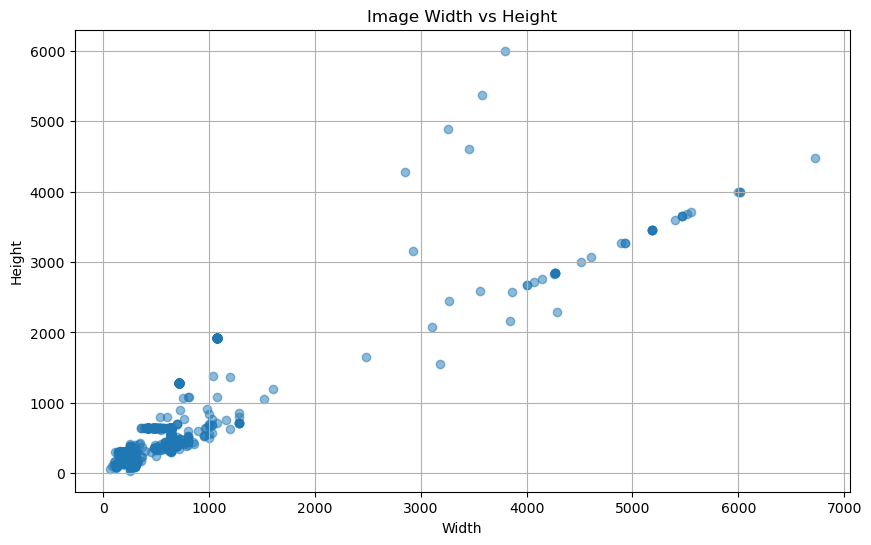

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV into a DataFrame
df = pd.read_csv('image_dataset.csv')

# Plotting example: Scatter plot of Width vs Height
plt.figure(figsize=(10, 6))
plt.scatter(df['Width'], df['Height'], alpha=0.5)
plt.title('Image Width vs Height')
plt.xlabel('Width')
plt.ylabel('Height')
plt.grid()
plt.show()


In [ ]:
import os
from PIL import Image
import imagehash

# Set the path to your main folder containing subfolders of images
folder_path = r'F:\Dataset DL PA'

duplicates=0
# Dictionary to store image hashes
hashes = {}

import os
from PIL import Image
import imagehash

# Set the path to your main folder containing subfolders of images
folder_path = r'F:\Dataset DL PA'

# Dictionary to store image hashes
hashes = {}

# Walk through all subfolders and files in the main folder
for root, dirs, files in os.walk(folder_path):
    for filename in files:
        file_path = os.path.join(root, filename)

        # Check if the file is an image
        if os.path.isfile(file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            try:
                # Open the image and generate its hash
                with Image.open(file_path) as img:
                    img_hash = imagehash.average_hash(img)

                # Check if the hash already exists
                if img_hash in hashes:
                    print(f"Duplicate found: {file_path} and {hashes[img_hash]}")
                    duplicates+=1
                    # Delete the duplicate image
                    os.remove(file_path)
                    print(f"Deleted duplicate image: {file_path}")
                else:
                    hashes[img_hash] = file_path

            except Exception as e:
                print(f"Error processing {file_path}: {e}")
print(f"Total Duplicate :{duplicates}")
print("Duplicate check and deletion complete.")

Total Duplicate :0
Duplicate check and deletion complete.


In [ ]:
base_path = 'F:\Dataset DL PA'  # Ganti dengan path ke folder dataset kamu
dataset = create_dataset(base_path)
for cls, images in dataset.items():
    print(f'Class: {cls}, Number of Images: {len(images)}')

Class: Anjing, Number of Images: 4791
Class: Ayam, Number of Images: 2899
Class: Jalak Bali, Number of Images: 1487
Class: Komodo, Number of Images: 2113
Class: Kucing, Number of Images: 1646
Class: Kupu-Kupu, Number of Images: 2041
Class: Macan Tutul, Number of Images: 1075
Class: Orang Utan, Number of Images: 1156


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os


In [ ]:
# Set the directory paths
base_dir = 'F:/Dataset DL PA'  # Path to your dataset directory

# Define ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,           # Normalize pixel values
    validation_split=0.2,      # Split 20% for validation
    rotation_range=20,         # Data augmentation
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(256, 256),    # Resize images to 256x256
    batch_size=32,
    class_mode='categorical',
    subset='training'           # Set as training data
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(256, 256),    # Also resize validation images to 256x256
    batch_size=32,
    class_mode='categorical',
    subset='validation'         # Set as validation data
)

Found 13769 images belonging to 8 classes.
Found 3439 images belonging to 8 classes.


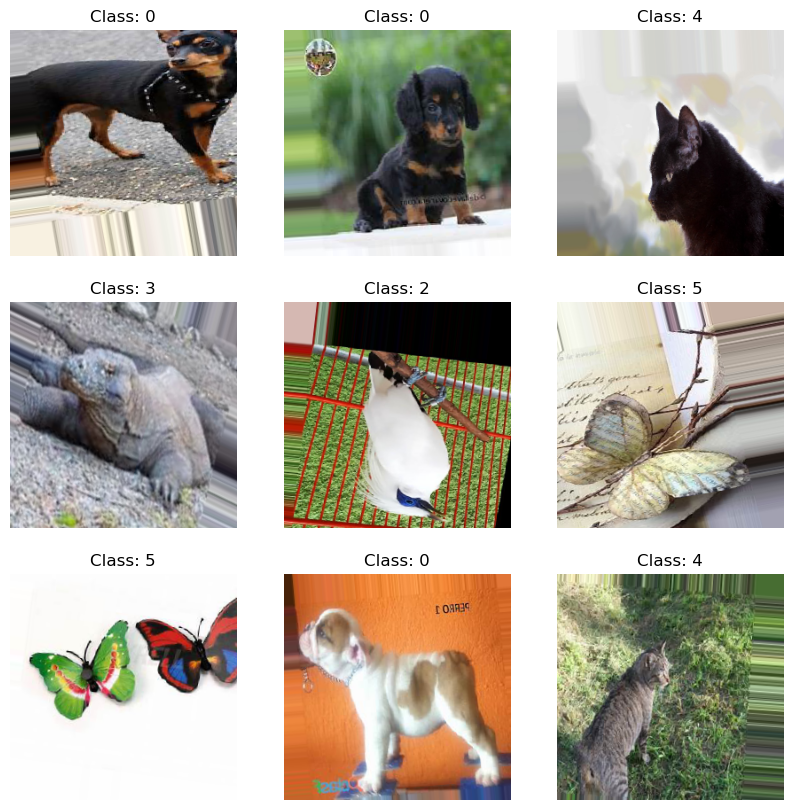

In [ ]:
train_datagen
# Fetch a batch from the generator
sample_batch = train_generator.next()
images, labels = sample_batch

# Plot a few sample images
plt.figure(figsize=(10, 10))
for i in range(9):  # Display first 9 images in a 3x3 grid
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f"Class: {np.argmax(labels[i])}")  # Display class index
    plt.axis('off')
plt.show()

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # Output layer for multi-class classification
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # For multi-class classification
    metrics=['accuracy']
)


In [ ]:
# Set the number of epochs
epochs = 20

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)


Epoch 1/20
431/431 [==============================] - 689s 2s/step - loss: 0.9442 - accuracy: 0.6592 - val_loss: 1.0145 - val_accuracy: 0.6214
Epoch 2/20
431/431 [==============================] - 712s 2s/step - loss: 0.8418 - accuracy: 0.6936 - val_loss: 0.9658 - val_accuracy: 0.6409
Epoch 3/20
431/431 [==============================] - 722s 2s/step - loss: 0.7636 - accuracy: 0.7242 - val_loss: 0.7628 - val_accuracy: 0.7156
Epoch 4/20
431/431 [==============================] - 659s 2s/step - loss: 0.6992 - accuracy: 0.7461 - val_loss: 0.6710 - val_accuracy: 0.7482
Epoch 5/20
431/431 [==============================] - 673s 2s/step - loss: 0.6424 - accuracy: 0.7673 - val_loss: 0.6736 - val_accuracy: 0.7598
Epoch 6/20
431/431 [==============================] - 702s 2s/step - loss: 0.6091 - accuracy: 0.7842 - val_loss: 0.7369 - val_accuracy: 0.7534
Epoch 7/20
431/431 [==============================] - 645s 1s/step - loss: 0.5654 - accuracy: 0.8009 - val_loss: 0.5661 - val_accuracy: 0.8017

108/108 [==============================] - 79s 730ms/step - loss: 0.4960 - accuracy: 0.8360
Validation accuracy: 83.60%


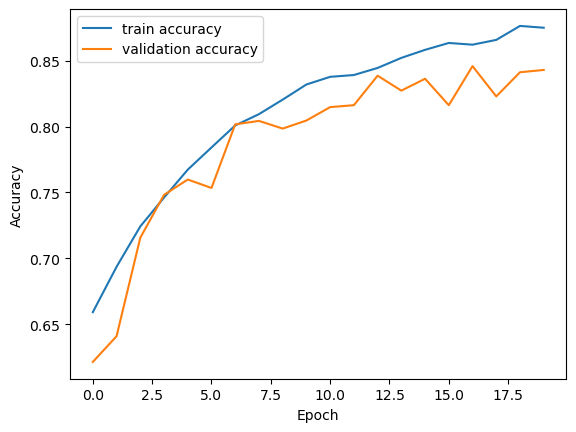

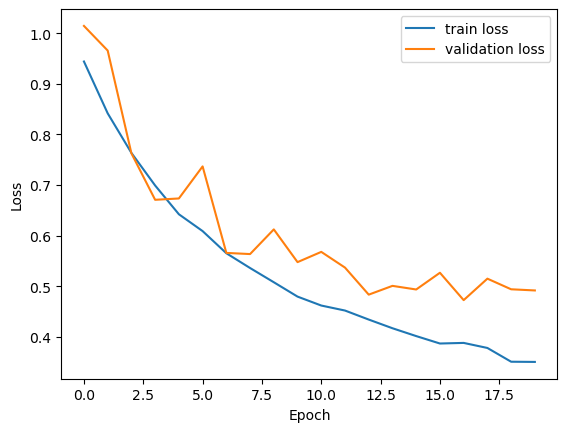

In [ ]:
# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_accuracy*100:.2f}%")

# Visualize training history
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 264ms/step


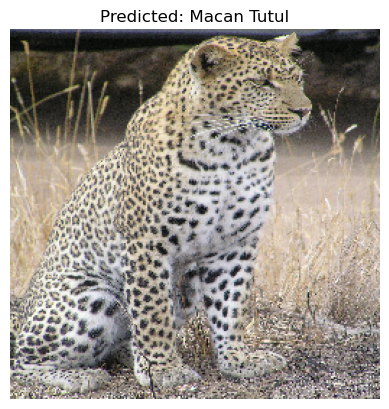

['Anjing', 'Ayam', 'Jalak Bali', 'Komodo', 'Kucing', 'Kupu-Kupu', 'Macan Tutul', 'Orang Utan']
Predicted Class: Macan Tutul
Prediction Confidence: 1.00
Prediction Rate: [7.7414080e-07 9.1939131e-05 1.0150962e-13 1.3765168e-06 1.3786511e-03
 1.1845586e-05 9.9851543e-01 2.9316333e-15]
Prediction Confidence: 0.9985154271125793


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Path to the image you want to predict
image_path = 'F:/Dataset DL PA/Macan_Tutul.jpg'  # Replace with your test image path

# Load and preprocess the image
img = image.load_img(image_path, target_size=(256, 256))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dims to match model's input shape
img_array /= 255.0  # Normalize the image

# Make a prediction
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions, axis=1)[0]

# Retrieve class labels from the train_generator
class_labels = list(train_generator.class_indices.keys())
predicted_label = class_labels[predicted_class]

# Display the image and prediction result
plt.imshow(img)
plt.title(f'Predicted: {predicted_label}')
plt.axis('off')
plt.show()

print(class_labels)
print(f"Predicted Class: {predicted_label}")
print(f"Prediction Confidence: {predictions[0][predicted_class]:.2f}")
print(f"Prediction Rate: {predictions[0]}")
print(f"Prediction Confidence: {predictions[0][predicted_class]}")

In [ ]:
from tensorflow.keras.models import load_model

model.save('cnn_model.h5')  # Save as HDF5